# Keystroke Dynamics OT2

In [5]:
from keylogParser import *
from stat_helpers import *

bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']

results = {}
users = ['oskar', 'johan', 'aoife', 'luke']

# compute statistics for user data
for user in users:
	user_results = get_pressed_data_diffs(bigrams, read_file(user))
	user_stats = get_stats(bigrams, user_results)
	results[user] = user_stats



## Print graphs by statistic for each user

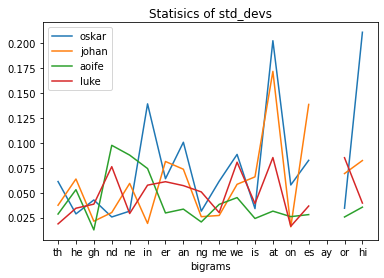

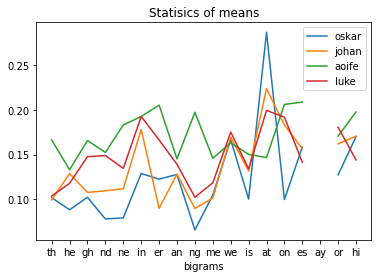

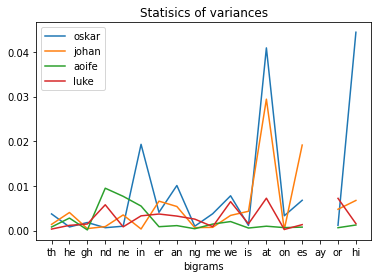

In [6]:
stat_keys = ['std_devs', 'means', 'variances']

for key in stat_keys:
	print_graph(results, key, bigrams, users)
	

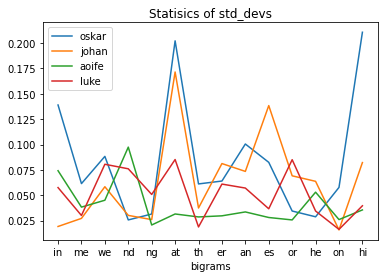

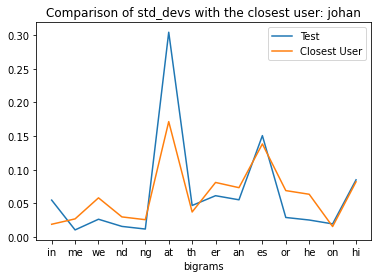

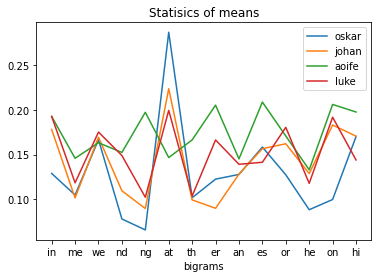

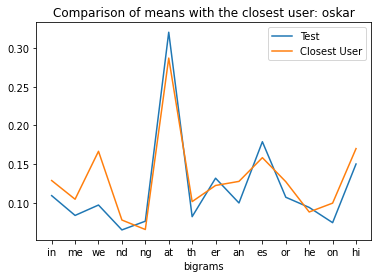

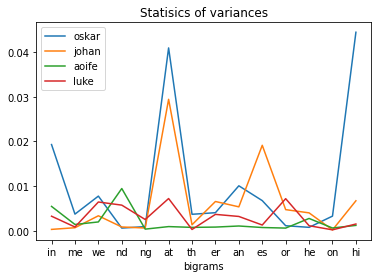

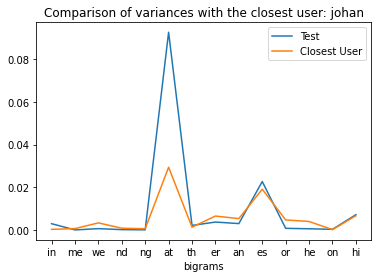

In [7]:
MSE = {}
closest_user = {'std_devs': '', 'means': '', 'variances': ''}

test_results = get_pressed_data_diffs(bigrams, read_file('test'))
test_stats = get_stats(bigrams, test_results)
test_bigrams = test_stats['present_bigrams']

# get common bigrams for all users and test data
common_bigrams = list(set(bigrams) & set(test_bigrams))
for user in users:
	user_bigrams = results[user]['present_bigrams']
	common_bigrams = list(set(common_bigrams) & set(user_bigrams))

# compute mse for the different bigrams towards user data
for user in users:
	MSE[user] = {}
	for stat_key in stat_keys:
		user_stat_array = []
		test_stat_array = []
		for bigram in common_bigrams:
			user_stat_array.append(results[user][stat_key][bigram])
			test_stat_array.append(test_stats[stat_key][bigram])
		MSE[user][stat_key] = mse(user_stat_array, test_stat_array)


for stat_key in stat_keys:
	closest_user[stat_key] = find_closest_user(MSE, stat_key)
	print_graph(results, stat_key, common_bigrams, users)
	print_closest_user_graph(results, test_stats, closest_user[stat_key], stat_key, common_bigrams)



## Compare statistics of Irish and Swedish native
In this data set, two Irish and two Swedish are represented. There are baseline differences here to be noted, such that Irish have english as native language and the Swedish do not. Another difference is layout of keyboard which differs a little between the two groups. This next sections aims to explore if there are any notable differences between the two in keystroke dynamics

In [14]:
## compute the collective data for each nationality
irish_results = get_pressed_data_diffs(bigrams, (read_file('luke') + read_file('aoife')))
irish_stats = get_stats(bigrams, irish_results)

swedish_results = get_pressed_data_diffs(bigrams, (read_file('oskar') + read_file('johan')))
swedish_stats = get_stats(bigrams, swedish_results)

# get them into a better data structure
national_results = {
	'irish': irish_stats,
	'swedish': swedish_stats
}
		

### Next print graph for different nationalities to see if there are any obvious differences

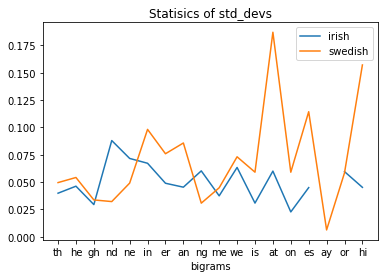

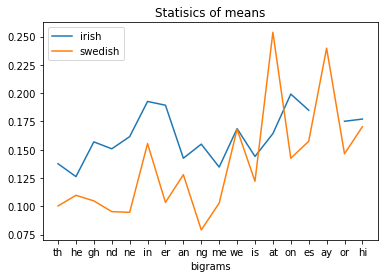

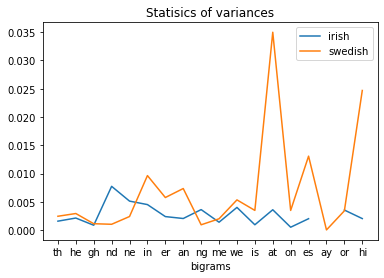

In [16]:
national_groups = ['irish', 'swedish']

for key in stat_keys:
	print_graph(national_results, key, bigrams, national_groups)

### Compare test data to national data 
Next we take the data we have computed for the different nationalities and compare it to the test data. Can we determine whether and Irish or Swedish has written this?

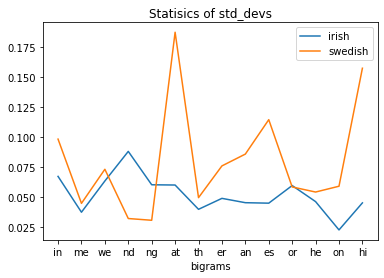

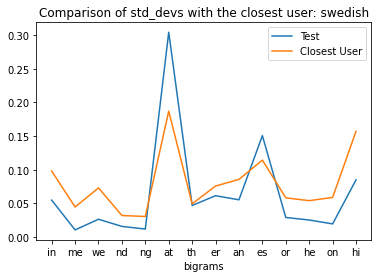

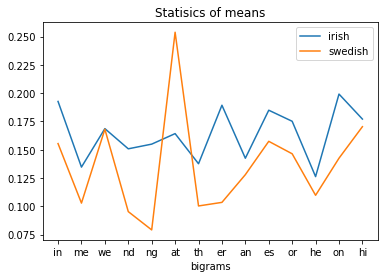

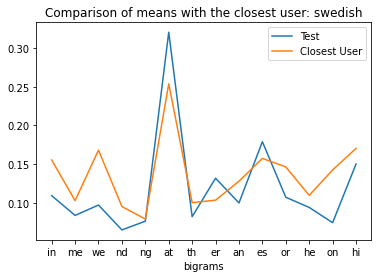

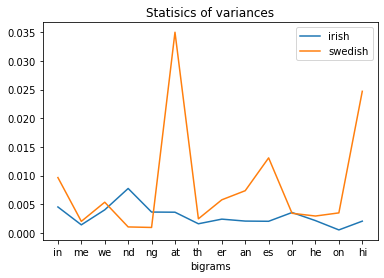

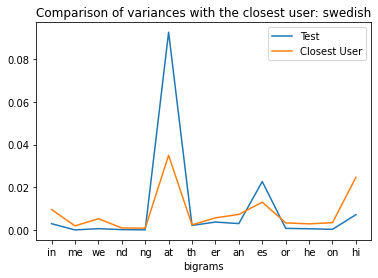

In [19]:
national_MSE = {}
closest_nationality = {'std_devs': '', 'means': '', 'variances': ''}

test_results = get_pressed_data_diffs(bigrams, read_file('test'))
test_stats = get_stats(bigrams, test_results)
test_bigrams = test_stats['present_bigrams']

# get common bigrams for nationalities and test data
common_national_bigrams = list(set(bigrams) & set(test_bigrams))
for group in national_groups:
	national_bigrams = national_results[group]['present_bigrams']
	common_national_bigrams = list(set(common_national_bigrams) & set(national_bigrams))

# compute national mse for the different bigrams towards nationality data
for group in national_groups:
	national_MSE[group] = {}
	for stat_key in stat_keys:
		national_stat_array = []
		test_stat_array = []
		for bigram in common_national_bigrams:
			national_stat_array.append(national_results[group][stat_key][bigram])
			test_stat_array.append(test_stats[stat_key][bigram])
		national_MSE[group][stat_key] = mse(user_stat_array, test_stat_array)


for stat_key in stat_keys:
	closest_nationality[stat_key] = find_closest_user(national_MSE, stat_key)
	print_graph(national_results, stat_key, common_national_bigrams, national_groups)
	print_closest_user_graph(national_results, test_stats, closest_nationality[stat_key], stat_key, common_national_bigrams)